[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gdsaxton/GDAN5400/blob/main/Week%208%20Notebooks/GDAN%205400%20-%20Week%208%20Notebooks%20%28III%29%20-%20Task%203%20-%20Identify%20Missing%20Data.ipynb)

This notebook provides a mini-tutorial on different ways of identifying missing data in the Titanic training dataset.

In [4]:
%%time
import datetime
print ("Current date and time : ", datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), '\n')

Current date and time :  2025-02-25 12:07:57 

CPU times: user 1.03 ms, sys: 1.95 ms, total: 2.98 ms
Wall time: 3.78 ms


# Load Packages and Set Working Directory
Import several necessary Python packages. We will be using the <a href="http://pandas.pydata.org/">Python Data Analysis Library,</a> or <i>PANDAS</i>, extensively for our data manipulations in this and future tutorials.

In [5]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

<br>
PANDAS allows you to set various options for, among other things, inspecting the data. I like to be able to see all of the columns. Therefore, I typically include this line at the top of all my notebooks.

In [6]:
#http://pandas.pydata.org/pandas-docs/stable/options.html
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 250)
pd.set_option('display.max_info_columns', 500)

### Read in the Titanic Training Data

In [9]:
import numpy as np
import pandas as pd

train_url = 'https://raw.githubusercontent.com/gdsaxton/GDAN5400/refs/heads/main/Titanic/train.csv'
train = pd.read_csv(train_url)
print('# of rows in training dataset:', len(train), '\n')
train[:2]

# of rows in training dataset: 891 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C


# Identify Variables with Missing Data 

Before we run our machine learning models we have to get the data ready to analyze, including identifying and fixing variables with missing values. Task 3 in the fourth coding assignment has the following requirements:

- **Part (i)**
  - Determine which variables contain missing values in the dataset using any acceptable method
- **Part (ii)**
  - Use the provided input function to manually enter the variables that have missing values, then hit `Enter` to continue. 

*Hints:*
- You can use the `.info()` method, `.isnull().sum()`, `.isna().sum()`, or `.describe()`


## Why Do Missing Values Matter?  
In real-world datasets, it’s common for some values to be missing. This can happen for many reasons, such as incomplete data collection or errors in recording information.

Missing values can affect how well our model performs, so before building a machine learning model, we must first **identify** which variables contain missing data.  


## Methods for Identifying Missing Data  

We can use several methods to check for missing values in our dataset:

### Option 1: Use `.info()` to get an overview  
```python
train.info()  
```
- This method shows the number of **non-null** values in each column.
- If the number of non-null values is less than the total number of rows, that column has missing values.

### Option 2: Use `.isnull().sum()` to count missing values  
```python
train.isnull().sum()  
```
- This method returns a count of missing values for each column.
- Any column with a number greater than **0** has missing values.

### Option 3: Use `.isna().sum()` (alternative method)  
```python
train.isna().sum()  
```
- This works the same way as `.isnull().sum()`, since `isna()` and `isnull()` are interchangeable in PANDAS.

### Option 4: Use `.describe()` for summary statistics  
```python
train.describe(include="all")  
```
- If the **count** for a column is lower than the total number of rows, it means some values are missing.

Below I will implement these different options for identifying the rows with missing data:

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The following two methods compute the total number of missing values for each column in the dataset. The first uses a native PANDAS method while the second uses NumPy.

Each returns a `Series` where each column name is paired with its count of missing values. Columns with zero missing values are also shown.

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The next two options are variations of the above that filter out columns that do not have missing values. They first calculate the missing value count (`train.isnull().sum()`), then keep only those where the count is greater than zero.

This is a more complicated, but cleaner, way to focus only on columns with missing values.

In [21]:
train.isnull().sum()[train.isnull().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [22]:
train.isna().sum()[train.isna().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

## Enter Variables with Missing Data  

Once you have identified the variables with missing values, manually enter them using the input function:  

```python
missing_vars = input("Enter the column names with missing values, separated by commas: ")  
print(f"You entered: {missing_vars}")  
```

This ensures that you've correctly identified the columns with missing data before moving on to handling them.  

From the above output, we can see that `Age`, `Cabin`, and `Embarked` contain missing values. You would then enter:  

```
Age, Cabin, Embarked
```

Now that we’ve identified missing values, we can decide how to handle them in the subsequent steps

In [8]:
missing_values = input("Enter variables missing values: ")
print(f"Variables missing data: {missing_values}")

Enter variables missing values: Age, Cabin, Embarked
Variables missing data: Age, Cabin, Embarked


### Task 4: Fill in Missing Values for `Age`
- The `Age` column contains missing values that must be filled before modeling.  
- Use the **median** age to replace missing values, as it is less affected by outliers.  
- After filling in the missing values, verify that `Age` no longer has any missing entries.  

In [9]:
train['Age'] = train['Age'].fillna(train["Age"].median())
print("Missing values in Age column:", train["Age"].isnull().sum())

Missing values in Age column: 0


### Task 5: Explore the Data with Histograms  
- Generate histograms for all **numeric features** in the dataset.  
- Use these histograms to understand the distribution of key variables such as `Age`, `Fare`, and `Pclass`.  
- **Tips:** 
  - Instead of plotting separate histograms for each variable, use the **shortcut method** we covered in class to generate all histograms at once.
  - Make sure to read in the plotting packages (*hint*: there are two relevant import lines we used in our Week 7 and Week 8 notebooks, as well as weeks 5 and 6)

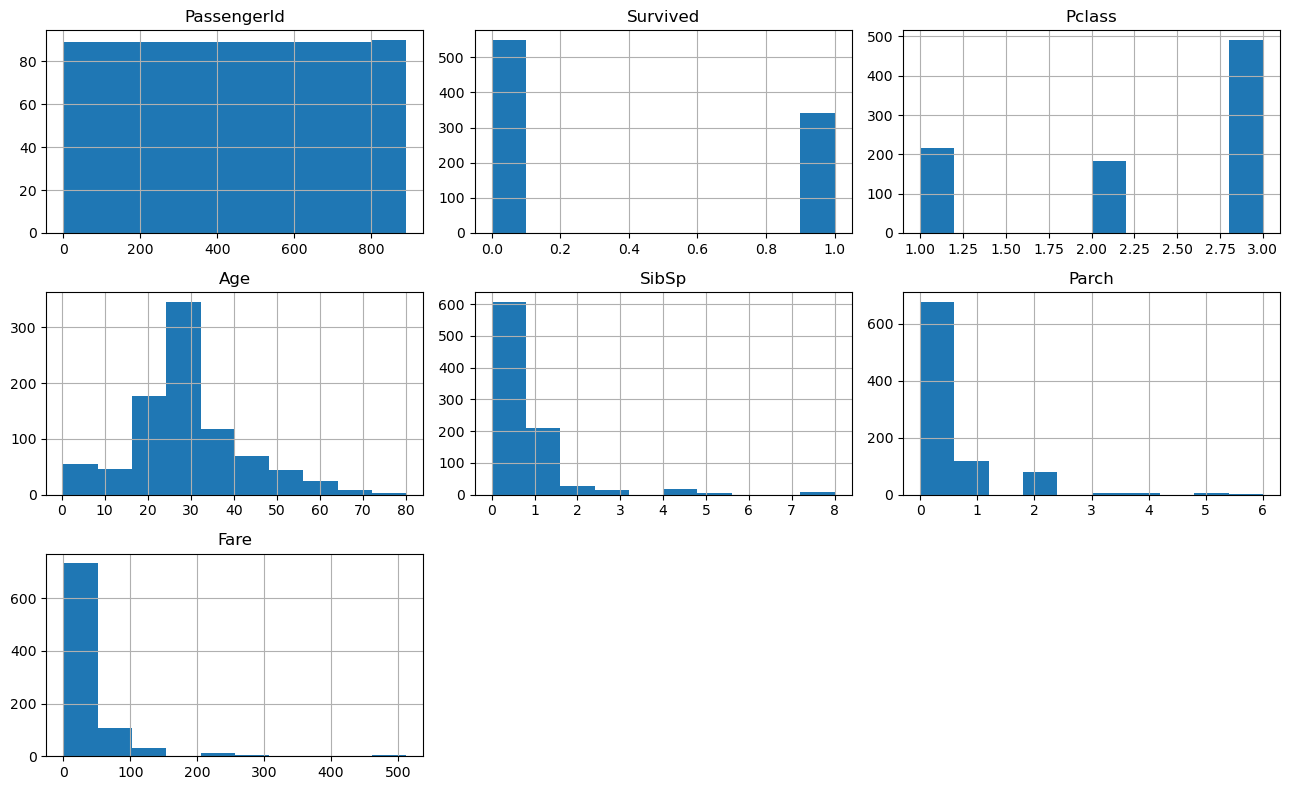

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

train.select_dtypes(include='number').hist(figsize=(13, 8))
plt.tight_layout()
plt.show()

### Task 6: Generate an Automated Data Report  
- Install and use `ydata-profiling` to create a detailed report of the dataset.  
- This report will provide insights into **missing values, distributions, correlations, and more**.  
- **Tip:** Instead of manually exploring each variable, use this **automated tool** to summarize the data in one step.  
- Save the report as an **HTML file** for easy viewing.

In [43]:
# Install ydata-profiling
!pip install ydata_profiling --quiet
# Install ydata-profiling
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.8 MB/s eta 0:00:00


In [ ]:
# Generate the report
profile = ProfileReport(train,title="Titanic")

In [55]:
# Save the report to an HTML file
profile.to_file("titanic.html")

### **Task 7: Convert `Sex` to a Numeric Variable called `Female`**  
- Convert the `Sex` column into a **numeric format** for modeling.  
- Map `female` to `1` and `male` to `0`.  
- Fill any missing values with `0` (though there should be none in this dataset).  

Below I provide a number of different options for generating the binary variable.

In [12]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
train['Female'] = train['Sex'].map({'female': 1, 'male': 0}).fillna(0)  # Default to 0 if missing
train['Female'].value_counts()

Female
0    577
1    314
Name: count, dtype: int64

In [14]:
train['Female'] = train['Sex'].apply(lambda x: 1 if x == 'female' else 0)
train['Female'].value_counts()

Female
0    577
1    314
Name: count, dtype: int64

In [15]:
train['Female'] = (train['Sex'] == 'female').astype(int)
train['Female'].value_counts()

Female
0    577
1    314
Name: count, dtype: int64

In [16]:
train['Female'] = np.where(train['Sex'] == 'female', 1, 0)
train['Female'].value_counts()

Female
0    577
1    314
Name: count, dtype: int64

In [17]:
train = pd.get_dummies(train, columns=['Sex'], drop_first=True)
train.rename(columns={'Sex_female': 'Female'}, inplace=True)
train['Female'].value_counts()

Female
0    577
1    314
Name: count, dtype: int64

### **Task 8: Prepare the Data for Modeling**  
- Select the **predictor variables (`X`)** and the **target variable (`y`)**.  
- Use `Age`, `Female`, and `Fare` as the features for prediction.  
- Split the data into **training (`X_train, y_train`)** and **testing (`X_test, y_test`)** sets using a standard 80/20 split.  
- Set `random_state=42` to ensure reproducibility.  

In [38]:
X = train[['Age', 'Female', 'Fare']]
y = train['Survived'] 

# Splitting training data into train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### **Task 9: Train and Evaluate a Logistic Regression Model**  
- Train a **logistic regression model** using the training data.  
- The predictor variables (`X`) used in this model are **Age, Female, and Fare**.  
- Use the trained model to make **predictions** on the test set.  
- Evaluate the model’s performance using the **accuracy** score.  
- *Hint*: Make sure to include the proper import statements from `sklearn`

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Generate predictions on validation set
val_predictions = model.predict(X_val)  # Previously y_pred

# Evaluate model performance on validation data
print("Accuracy:", accuracy_score(y_val, val_predictions), '\n')

Accuracy: 0.776536312849162 



<br>We can also print the model *coefficients* to understand the influence of each variable.  

In [40]:
print("Model coefficients (Based on Age, Female, and Fare):\n")
print('\tIntercept:', model.intercept_[0])
print('\tAge coefficient:', model.coef_[0][0])
print('\tFemale coefficient:', model.coef_[0][1])
print('\tFare coefficient:', model.coef_[0][2], '\n')

Model coefficients (Based on Age, Female, and Fare):

	Intercept: -1.5639624479395506
	Age coefficient: -0.005799829744918314
	Female coefficient: 2.335279581705797
	Fare coefficient: 0.01016203209179087 



### **Task 10: Make Predictions on `test.csv` and Generate Submission File**  
- Load the **Kaggle test dataset** (`test.csv`) from the provided GitHub URL.  
- Apply the **same transformations** used on the training data:  
  - Convert `Sex` into a numeric column (`Female` = 1, `Male` = 0).  
  - Fill in missing values on `Age`
- **Hint:** Before making predictions, **ensure there are no missing values** in the variables used for training (`Age`, `Female`, and `Fare`). Double-check all variables and apply any necessary transformations before proceeding.  
- Select the same predictor variables (`Age`, `Female`, `Fare`) used in training.  
- Use the trained model to make **predictions on the test set**.  
- **Important:** The submission file **must match Kaggle’s format exactly**—every `PassengerId` must have a prediction, and no values can be missing.  

In [41]:
test_url = 'https://raw.githubusercontent.com/gdsaxton/GDAN5400/refs/heads/main/Titanic/test.csv'
test = pd.read_csv(test_url)
print(len(test))
test.head()

418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
#Look for missing values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [45]:
# Apply the same transformations as in training
test['Female'] = test['Sex'].map({'female': 1, 'male': 0}).fillna(0)  # Convert Sex to numeric
test['Age'] = test['Age'].fillna(train['Age'].median())  # Fill missing Age values with median

In [46]:
#Fill in the 1 missing value on Fare
test['Fare'] = test['Fare'].fillna(train['Fare'].median())  # Fill missing Fare values with median

In [47]:
# Verify no missing values before making predictions
print("\nMissing values in test dataset:")
print(test[['Age', 'Female', 'Fare']].isnull().sum())  # Check for missing values in model variables


Missing values in test dataset:
Age       0
Female    0
Fare      0
dtype: int64


In [48]:
# Select the same predictor variables as in training
X_test = test[['Age', 'Female', 'Fare']]

In [50]:
# Generate predictions for Kaggle test set
test_predictions = model.predict(X_test)
print('# of predictions:', len(test_predictions))
test_predictions[:5]

# of predictions: 418


array([0, 1, 0, 0, 1])

In [41]:
# Create submission file
submission_df = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": test_predictions})
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [42]:
#If you want to see the predicted frequencies
submission_df['Survived'].value_counts()

Survived
0    260
1    158
Name: count, dtype: int64

In [38]:
#Save file
submission.to_csv("submission.csv", index=False)
print("Submission file 'submission.csv' created successfully!")

Submission file 'submission.csv' created successfully!


---

## **Deliverables**
1. Submit the link to you Google Colab notebook in the assignment area in Canvas.
2. Include comments in your code to explain each step.

---

## Bonus Points

If you beat my Kaggle score you can earn an additional 10% (1 point out of 10). 

To claim the bonus, upload a screenshot showing your submission with your *Public Score*. Below is a screenshot of my submission with a score of 0.28117.

![](https://github.com/gdsaxton/GDAN5400/blob/main/Titanic/Titanic%20submission.png?raw=true)

##### Here is code you can use to upload you screenshot

In [ ]:
from google.colab import files
from IPython.display import display, Image

# Upload the screenshot
uploaded = files.upload()  # Prompts file upload dialog

# Display the uploaded image (assuming it's the first uploaded file)
for filename in uploaded.keys():
    display(Image(filename))
    break  # Display only the first uploaded image